## Finite Difference solution of the hydrodynamical equation with Self Gravity 

In this notebook we write the code to study jeans instabilty in 1D using Finite difference method for 
the continuity and the momentum equation and FFT for the Poisson's eqn

@author: Sayantan Auddy

Date: 24 Feb 2023



### 1.1 Equations

The hydrostatic system with self-gravity-- 

For an isothermal gas in 1 dimension, the dynamics is governed by continuity eqution and momentum equation. They are given as follows,
$$
\begin{eqnarray}
\frac{\partial \rho}{\partial t} &=& -\frac{\partial}{\partial x}\left(\rho v_{x}\right)\\
\rho\frac{d }{d t}v_{x}&=& -\frac{\partial }{\partial x}P 
\end{eqnarray}\tag{4}
$$

Where eqn (4) represents the equation of continuity and momentum equation. The LHS of eqn (4a) is the the product of density and acceleration and RHS is force due to pressure gradient. Where $d/dt$ is the Lagrangian derivative. In one dimension it is defined as follows,

$$
\begin{equation}
\frac{d}{dt} = \frac{\partial}{\partial t}+v_{x}\frac{\partial}{\partial x} 
\end{equation}\tag{5}
$$
And for an isothermal gas,
$$
\begin{equation}
c_{s} = \sqrt{\frac{P}{\rho}}
\end{equation}\tag{6}
$$

The poisson's equation

$$
\begin{equation}
\nabla^2 \phi =  4 \pi G \rho
\end{equation} \tag{7}
$$
or rewriting interm of the field


\begin{equation}
\nabla \phi =  - \vec g 
% \nabla . \vec g = -4\pi G\rho
\end{equation}

$$
\begin{equation}
\nabla . \vec g = -4\pi G\rho
\end{equation}
$$

Using equation (5) and (6) we can rewrite equation (4b) as

$$
\begin{eqnarray}
\rho\frac{\partial v_{x}}{\partial t}+\rho v_{x}\frac{\partial v_{x}}{\partial x} &=& -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g} \nonumber\\
\Rightarrow \rho\frac{\partial v_{x}}{\partial t} +\frac{\partial\rho v_{x} v_{x}}{\partial x} - v_{x}\frac{\partial\rho v_{x}}{\partial x} &=& -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g} \nonumber\\
\Rightarrow \rho\frac{\partial v_{x}}{\partial t} - v_{x}\frac{\partial \rho v_{x}}{\partial x} &=&-\frac{\partial \rho v_{x} v_{x}}{\partial x}-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g}
\end{eqnarray}\tag{8}
$$

Now substituting equation (4a) in to  (7c) we get,
$$
\begin{eqnarray}
\rho\frac{\partial v_{x}}{\partial t} +v_{x}\frac{\partial \rho}{\partial t} &=& -\frac{\partial\rho v_{x} v_{x}}{\partial x}-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g}\nonumber\\
\Rightarrow \frac{\partial\rho v_{x}}{\partial t} &=&-\frac{\partial\rho v_{x} v_{x}}{\partial x}-c^{2}_{s}\frac{\partial\rho}{\partial x}+ \rho \vec{g}\nonumber
\end{eqnarray}\tag{9}
$$

Hence the flux conservative form of momentum equation and the continuity equation is given by,

$$
\begin{eqnarray}
\frac{\partial \rho}{\partial t} &=& -\frac{\partial}{\partial x}\left(\rho v_{x}\right)\\
\end{eqnarray}\tag{10}
$$
$$
\begin{eqnarray}
\frac{\partial\left(\rho v_{x}\right)}{\partial t} &=&-\frac{\partial}{\partial x}\left(\rho v_{x} v_{x}\right)-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g}
\end{eqnarray}\tag{11}
$$

Equation (10) and (11) will decide the dynamics of gas with given boundary and initial condition.


$$
\begin{eqnarray}
\rho(x) &=& \rho_{0} + \rho_{1}\cos\left(2\pi x/\lambda\right)\\
v_{x}(x) &=& v_{1} \cos\left(2\pi x/\lambda\right) or \\
\end{eqnarray}\tag{11}
$$

If $\omega^2 < 0$, the system in unstable such that $4 \pi G \rho_0 > c_s^2 k^2$. The $\omega = \pm i \alpha$ where 

$$
\begin{eqnarray}
    \alpha = \sqrt{ 4 \pi G \rho_0 - c_s^2 k^2}
\end{eqnarray}
$$

Then the initial velocity perturbation is
$$
\begin{eqnarray}
v_{x}(x) &=& - v_{1} \sin\left(2\pi x/\lambda\right)
\end{eqnarray}
$$

where
$$
\begin{eqnarray}
     i \omega \rho_1 - i  k \rho_0 v_1 =& 0  \\ \nonumber
     v_1 =& \frac{\omega}{k}\frac{\rho_1}{\rho_0} 
\end{eqnarray}
$$
In this section using the Lax method equation (9) and (10) are solved. If the equation (2) is subsituted in  (9) and (10) we will get the following as the solution for $\rho$ and $v_{x}$.

$$
\begin{eqnarray}
\rho^{n+1}_{j}= \frac{1}{2}\left(\rho^{n}_{j+1} +\rho^{n}_{j-1}\right)-\frac{\Delta t}{2\Delta x}\left(\rho^{n}_{j+1} v^{n}_{j+1}-\rho^{n}_{j-1} v^{n}_{j-1}\right)\\
U^{n+1}_{j} = \frac{1}{2}\left(U^{n}_{j+1} +U^{n}_{j-1}\right)-\frac{\Delta t}{2\Delta x}\left(U^{n}_{j+1} v^{n}_{j+1}-U^{n}_{j-1} v^{n}_{j-1}\right)-\frac{c^{2}_{s}\Delta t}{2\Delta x}\left(\rho^{n}_{j+1}-\rho^{n}_{j-1}\right) -\frac{\Delta t \rho^n_{j}}{2\Delta x}\left(\phi^{n}_{j+1}-\phi^{n}_{j-1}\right)
\end{eqnarray}
$$

$$
\begin{equation}
U^{n}_{j} = v^{n}_{j} \rho^{n}_{j}
\end{equation}
$$

Where $n$ corresponds to time index and $j$ corresponds to space index.



In [1]:
def fft_solver(rho,Lx,N, dim = None):
    
    '''
    A FFT solver that uses discrete Fast Fourier Transform to
    solve the poisson Equation:
    We apply the correct due to the finite difference grid of phi
    
    Input: 1. The source function density in this case
           2. # of grid point N
           3. Domain Size in each dimension
    
    Output: the potential phi and the field g 
    
    '''
    nx = N
    Lx = Lx
    
    dx = Lx / nx
    
    
    # Calculate the Fourier modes of the gas density
    rhohat = fft(rho)

    # Calculate the wave numbers in x and y directions
    kx = 2 * np.pi * np.fft.fftfreq(nx, dx)
    #ky = 2 * np.pi * np.fft.fftfreq(ny, dy)

    # Construct the Laplacian operator in Fourier space
    kx2 = np.meshgrid(kx**2)
    
#     laplace = -(kx**2 )
    ## Laplace with the correction refer to the notes
    laplace = 2*(np.cos(kx*dx)-1)
    
    ## Inorder to avoid the inf we replace zero with a small number
    laplace[laplace == 0] = 1e-16
    
    # Solve for the gravitationa potential in Fourier space
    phihat = rhohat / laplace
    
    phihat = rhohat * dx**2/laplace
#     window = signal.windows.tukey(len(phihat),alpha=0.25)


    # Transform back to real space to obtain the solution
#     phi = np.real(ifft(phihat*window))
    phi = np.real(ifft(phihat))
    
    ## The field ,i.e., gravity 
    dphidx = np.gradient(phi, dx)

    return phi,dphidx

In [25]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1, 2023

@author: Sayantan
"""

#import pandas as pd
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
from scipy import signal
#%matplotlib inline


######### Finite Difference Solution #######
rho_1 = 0.01
rho_o = 1            # zeroth order density


def lax_solution(time,lam,num_of_waves,rho_1 = rho_1,gravity=False,isplot = None,animation=None):
        
    lam = lam          # one wavelength
    num_of_waves  = num_of_waves  
    L = lam * num_of_waves            # Maximum length (two wavelength)
    
    print("at time= ",time)
    ### Declaring the Constants

    c_s = 1.0            # % Sound Speed        
    nu = 0.5            # courant number (\nu = 2 in 2d)
    rho_1 = rho_1        # question 2a linear wave propagation
    const =  1 # 4.0 * np.pi           # The actual value is 4*pi
    G = 1

    ### Grid X-T 
    N = 2000            # The grid resolution values2d:N =(10,50,100,500)
    dx = float(L/N)      # length spacing        
    dt = nu*2*dx         # time grid spacing

    n = int(time/dt)     # grid points in time
    print("For time grid n = {} ".format(n))
    
    ## Initializing the ARRAY
    x = np.linspace(0, L, N)
    rho = np.zeros((n,N))
    dphidx = np.zeros((n,N))
    phi = np.zeros((n,N))
    v =np.zeros((n,N))  
    P =np.zeros((n,N))
    
#         print(np.shape(rho))

    jeans = np.sqrt(4*np.pi**2*c_s**2/(const*G*rho_o))
    print("Jean's Length",jeans)

    
    ######################## Initial Conditions ###########################
    rho[0,:] = rho_o + rho_1* np.cos(2*np.pi*x/lam) # defing the density at t = 0
    
    if gravity == False:
        print("Propagation of Sound wave")
        v_1 = (c_s*rho_1)/rho_o # velocity perturbation
        v[0,:] = v_1 * np.cos(2*np.pi*x/lam) # the velocity at t =0
    else:
        if lam >= jeans:
            print("There is gravitational instabilty  lam = {} > l_jean ={}".format(lam,jeans))
            alpha = np.sqrt(const*G*rho_o-c_s**2*(2*np.pi/lam)**2)
            v_1  = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) ## With gravity        
            v[0,:] = - v_1 * np.sin(2*np.pi*x/lam) # the velocity at t =0
            ## density values from Linear Theory at t
            rho_LT = rho_o + rho_1*np.exp(alpha * time)*np.cos(2*np.pi*x/lam)
            rho_LT_max = np.max(rho_o + rho_1*np.exp(alpha * time)*np.cos(2*np.pi*x/lam))
#             print("rho_theory_max={} and the max density {} at time {}".format(rho_LT_max ,rho_max, round(time,2)))

        else:
            print("There is no gravitational instabilty as lam = {} < l_jean ={}".format(lam,jeans))
            alpha = np.sqrt(c_s**2*(2*np.pi/lam)**2 - const*G*rho_o)
            v_1 = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) # velocity perturbation
            v[0,:] = v_1 * np.cos(2*np.pi*x/lam) # the velocity at t =0

        ## Calculating the potential and the field using FFT    
        phi[0,:],dphidx[0,:] = fft_solver(const*(rho[0,:]-rho_o),L,N, dim = None)

    ######### The Flux term #########
    P=rho*v

    #################################FINITE DIFFERENCE #######################
    for k in range(1,n):

        rho[k,:] = 0.5*(np.roll(rho[k-1,:],-1)+ np.roll(rho[k-1,:],1))-(nu*(np.roll(rho[k-1,:],-1)*np.roll(v[k-1,:],-1)-np.roll(rho[k-1,:],1)*np.roll(v[k-1,:],1)))

        if gravity == False:

            P[k,:] = 0.5*(np.roll(P[k-1,:],-1)+ np.roll(P[k-1,:],1))-(nu*(np.roll(P[k-1,:],-1)*np.roll(v[k-1,:],-1)- np.roll(P[k-1,:],1)*np.roll(v[k-1,:],1)))-((c_s**2)*nu*(np.roll(rho[k-1,:],-1)- np.roll(rho[k-1,:],1)))
        else:

            P[k,:] = 0.5*(np.roll(P[k-1,:],-1)+ np.roll(P[k-1,:],1))-(nu*(np.roll(P[k-1,:],-1)*np.roll(v[k-1,:],-1)- np.roll(P[k-1,:],1)*np.roll(v[k-1,:],1)))\
            -((c_s**2)*nu*(np.roll(rho[k-1,:],-1)- np.roll(rho[k-1,:],1))) -(nu*rho[k-1,:]*(np.roll(phi[k-1,:],-1)- np.roll(phi[k-1,:],1)))#  - dt*rho[k-1,:]* dphidx[k-1,:]  #  # np.roll(rho[k-1,:],-1)*np.roll(dphidx[k-1,:],-1)

            phi[k,:],dphidx[k,:] = fft_solver(const*(rho[k,:]-rho_o),L,N, dim = None) ## Please note we don't use dphidx rather calculate using central differencing

        rho_max = np.max(rho[k-1,:])

        v[k,:] = P[k,:]/rho[k,:]
        
    ################################# PLOTTING #######################
 
    if isplot : 
        plt.figure(1,figsize=(6,4))
        plt.plot(x,rho[n-1,:]-rho_o,linewidth=1,label="t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{x}$")
        # plt.text(.6,.15,r"dt=%f"%(dt),fontsize=12)
        plt.title("At time {} and rho_1 = {}".format(time,rho_1))
        plt.ylabel(r"$\mathbf{\rho - \rho_{0}}$")

        plt.figure(2,figsize=(6,4))
        plt.plot(x,v[n-1,:],'--',markersize=2,label="t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{x}$")
        plt.title(r"Lax Solution Velocity For $\rho_1$ = {}".format(rho_1))
        plt.ylabel("velocity")

        if gravity:
             #### Plotting the comparison of the \rho_max for FD and Linear Theory 
            
            plt.figure(3,figsize=(6,4))                                
            plt.scatter(time,rho_max)
            plt.scatter(time,rho_LT_max,facecolors='none', edgecolors='r',label="LT")           
            plt.xlabel("t")
            plt.ylabel(r"$\log (\rho_{\rm max} - \rho_{0}) $")
            plt.yscale('log')
            plt.legend(numpoints=1,loc='upper left',fancybox=True,shadow=True)

            ## Plotting the gravitational potential (\phi) and field (g)
            plt.figure(4,figsize=(6,4))
            plt.plot(x,phi[n-1,:],'--',markersize=2,label="t=phi at {}".format(round(time,2)))
#                 plt.plot(x,dphidx[n-1,:],'--',markersize=2,label="g at t={}".format(time))
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
            plt.xlabel(r"$\mathbf{x}$")
            plt.title(r"Lax Solution Phi For $\rho_1$ = {}".format(rho_1))
            plt.ylabel(r"$\Phi$")

            plt.figure(5,figsize=(6,4))
#                 plt.plot(x,phi[n-1,:],'--',markersize=2,label="t=phi at {}".format(time))
            plt.plot(x,dphidx[n-1,:],'--',markersize=2,label="g at t={}".format(round(time,2)))
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
            plt.xlabel(r"$\mathbf{x}$")
            plt.title(r"Lax Solution Phi For $\rho_1$ = {}".format(rho_1))
            plt.ylabel(r"$g$")

    else:
        if gravity:
            return x,rho,v,phi,dphidx,n,rho_LT,rho_LT_max,rho_max
        else:
            return rho,v
            
    ## Clearing the memory
    del rho, dphidx, phi, v, P

at time=  1.0
For time grid n = 95 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7 > l_jean =6.283185307179586
at time=  1.0
For time grid n = 95 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7 > l_jean =6.283185307179586


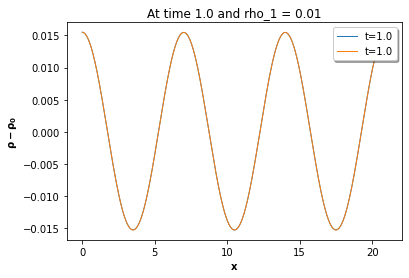

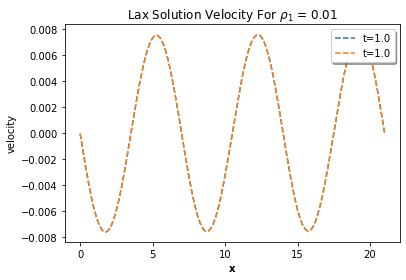

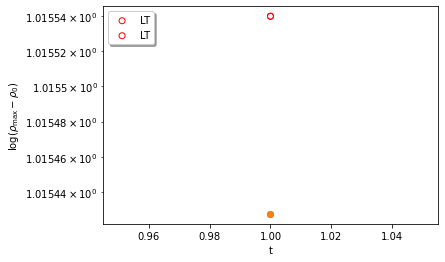

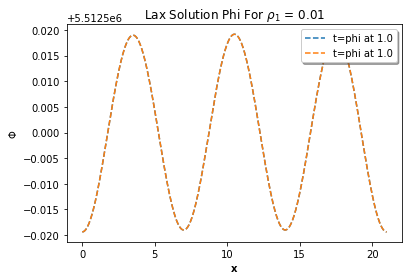

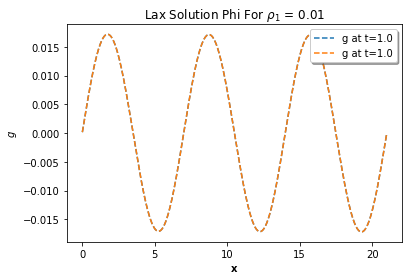

In [16]:
lam = 7
num_of_waves  = 3
tmax = 1
time = tmax

## Plotting the results from the lax solution for any given time
# lax_solution(time,lam,num_of_waves,rho_1,gravity=True,isplot=True)

## For overplotting the results for differnt times:
time_array = np.linspace(1,tmax,tmax+1)
for time in time_array:
    lax_solution(time,lam,num_of_waves,rho_1,gravity=True,isplot=True)


at time=  0.1
For time grid n = 9 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7 > l_jean =6.283185307179586
at time=  1.08
For time grid n = 102 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7 > l_jean =6.283185307179586
at time=  2.06
For time grid n = 196 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7 > l_jean =6.283185307179586
at time=  3.0400000000000005
For time grid n = 289 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7 > l_jean =6.283185307179586
at time=  4.0200000000000005
For time grid n = 382 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7 > l_jean =6.283185307179586
at time=  5.0
For time grid n = 476 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7 > l_jean =6.283185307179586


Text(0, 0.5, 'Diff_growth |LT-FD|')

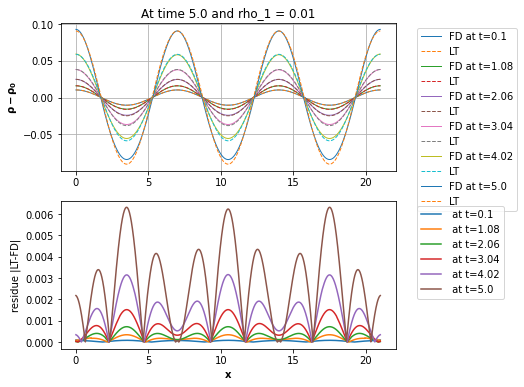

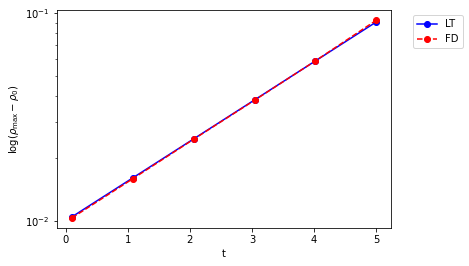

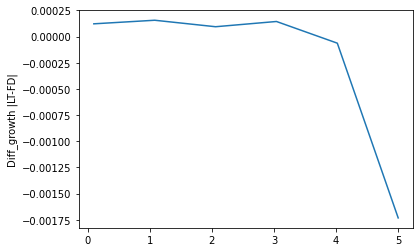

In [26]:
## TO compare the growth rate between the FD and Linear Theory methods
lam = 7
num_of_waves  = 3
tmax = 5
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(6,6) )
time_array = np.linspace(0.1,tmax,tmax+1)
# time_array = np.array(4)
Growth_LT_list = []
Growth_FD_list = []
for time in time_array:
    x,rho,v,phi,dphidx,n, rho_LT,rho_LT_max,rho_max= lax_solution(time,lam,num_of_waves,rho_1,gravity=True,isplot=False)
    ## Calculating the growth rate
    Growth_LT = rho_LT_max - rho_o
    Growth_FD = rho_max - rho_o  
    Growth_LT_list.append(Growth_LT)
    Growth_FD_list.append(Growth_FD)
    ax1.plot(x,rho[n-1,:]-rho_o,linewidth=1,label="FD at t={}".format(round(time,2)))
    ax1.grid("True")
    ax1.plot(x,rho_LT-rho_o,'--',linewidth=1,label="LT")
    ax1.set_title("At time {} and rho_1 = {}".format(time,rho_1))
    ax1.set_ylabel(r"$\mathbf{\rho - \rho_{0}}$")
#     ax1.set_xlabel(r"$\mathbf{x}$")
    ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    diff_wave = np.array(rho[n-1,:]-rho_o)-np.array(rho_LT-rho_o)
    ax2.plot(x,abs(diff_wave),label=" at t={}".format(round(time,2)))

    ax2.set_ylabel(r"residue |LT-FD|")
    ax2.set_xlabel(r"$\mathbf{x}$")
    ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
   


    
# print(Growth_FD_list)
plt.figure()
plt.plot(time_array,Growth_LT_list,marker='o', color='b',label= "LT")
plt.plot(time_array, Growth_FD_list,'--',marker='o',color='r',label= "FD")
plt.xlabel("t")
plt.ylabel(r"$\log (\rho_{\rm max} - \rho_{0}) $")
plt.yscale('log')
# plt.grid("True")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.figure()
diff = (np.array(Growth_LT_list) - np.array(Growth_FD_list))
plt.plot(time_array,np.array(diff))
plt.ylabel(r"Diff_growth |LT-FD|")
# plt.yscale('log')
# plt.legend(numpoints=1,loc='upper left',fancybox=True,shadow=True)



In [5]:
Growth_LT_list 

[0.03135202624417821,
 0.048363584383009695,
 0.07460558613199164,
 0.11508645509023507,
 0.1775321773064542,
 0.27386084621738016,
 0.42245729325696124]

In [6]:
# #!/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on Sat Jan  7 10:59:16 2017

# @author: Sayantan
# """

# #import pandas as pd
# #%matplotlib inline

# import numpy as np
# import matplotlib.pyplot as plt
# import numpy as np
# from numpy.fft import fft, ifft
# from scipy import signal
# #%matplotlib inline


# ######### Finite Difference Solution #######
# rho_1 = 0.03
# rho_o = 1            # zeroth order density
# Growth_LT_list = []
# Growth_FD_list = []
# def lax_solution(time_array,lam,num_of_waves,rho_1 = rho_1,gravity=False,isplot = None,animation=None):
    
#     if animation:
#         ## Converting the float (time-input) to an numpy array for animation
#         ## Ignore this when the function is called in isolation
#         time_array = np.array([time_array])
#         print("time",np.asarray(time_array))
    
#     lam = lam          # one wavelength
#     num_of_waves  = num_of_waves  
#     L = lam * num_of_waves            # Maximum length (two wavelength)
    
#     for time in time_array:
#         print("at time= ",time)
#         ### Declaring the Constants
        
#         c_s = 1.0            # % Sound Speed        
#         nu = 0.3             # courant number (\nu = 2 in 2d)
#         rho_1 = rho_1        # question 2a linear wave propagation
#         const =  1 # 4.0 * np.pi           # The actual value is 4*pi
#         G = 1
        
#         ### Grid X-T 
#         N = 1000            # The grid resolution values2d:N =(10,50,100,500)
#         dx = float(L/N)      # length spacing        
#         dt = nu*2*dx         # time grid spacing
        
#         n = int(time/dt)     # grid points in time
        
#         if n > 1: 
#             ## Initializing the ARRAY
#             x = np.linspace(0, L, N)
#             rho = np.zeros((n,N))
#             dphidx = np.zeros((n,N))
#             phi = np.zeros((n,N))
#             v =np.zeros((n,N))  
#             P =np.zeros((n,N))
#         else:
#             print("")
# #         print(np.shape(rho))
        
#         jeans = np.sqrt(4*np.pi**2*c_s**2/(const*G*rho_o))
#         print("Jean's Length",jeans)
#         # Initial Conditions
        
#         rho[0,:] = rho_o + rho_1* np.cos(2*np.pi*x/lam) # defing the density at t = 0
        
#         if gravity == False:
#             print("Propagation of Sound wave")
#             v_1 = (c_s*rho_1)/rho_o # velocity perturbation
#             v[0,:] = v_1 * np.cos(2*np.pi*x/lam) # the velocity at t =0
#         else:
#             if lam >= jeans:
#                 print("There is gravitational instabilty  lam = {} > l_jean ={}".format(lam,jeans))
#                 alpha = np.sqrt(const*G*rho_o-c_s**2*(2*np.pi/lam)**2)
#                 v_1  = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) ## With gravity        
#                 v[0,:] = - v_1 * np.sin(2*np.pi*x/lam) # the velocity at t =0
#                 ## Calculate the gravitational potential and the field  at t= 0
                 
#             else:
#                 print("There is no gravitational instabilty as lam = {} < l_jean ={}".format(lam,jeans))
#                 alpha = np.sqrt(c_s**2*(2*np.pi/lam)**2 - const*G*rho_o)
#                 v_1 = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) # velocity perturbation
#                 v[0,:] = v_1 * np.cos(2*np.pi*x/lam) # the velocity at t =0
                
#             ## Calculating the potential and the field using FFT    
#             phi[0,:],dphidx[0,:] = fft_solver(const*(rho[0,:]-rho_o),L,N, dim = None)
        
#         ## The Flux term
#         P=rho*v

        

# #         plt.plot(x,dphidx[0,:] ,'--',markersize=2)
#         for k in range(1,n):

#             rho[k,:] = 0.5*(np.roll(rho[k-1,:],-1)+ np.roll(rho[k-1,:],1))-(nu*(np.roll(rho[k-1,:],-1)*np.roll(v[k-1,:],-1)-np.roll(rho[k-1,:],1)*np.roll(v[k-1,:],1)))
            
#             if gravity == False:

#                 P[k,:] = 0.5*(np.roll(P[k-1,:],-1)+ np.roll(P[k-1,:],1))-(nu*(np.roll(P[k-1,:],-1)*np.roll(v[k-1,:],-1)- np.roll(P[k-1,:],1)*np.roll(v[k-1,:],1)))-((c_s**2)*nu*(np.roll(rho[k-1,:],-1)- np.roll(rho[k-1,:],1)))
#             else:
                
#                 P[k,:] = 0.5*(np.roll(P[k-1,:],-1)+ np.roll(P[k-1,:],1))-(nu*(np.roll(P[k-1,:],-1)*np.roll(v[k-1,:],-1)- np.roll(P[k-1,:],1)*np.roll(v[k-1,:],1)))\
#                 -((c_s**2)*nu*(np.roll(rho[k-1,:],-1)- np.roll(rho[k-1,:],1))) -(nu*rho[k-1,:]*(np.roll(phi[k-1,:],-1)- np.roll(phi[k-1,:],1)))#  - dt*rho[k-1,:]* dphidx[k-1,:]  #  # np.roll(rho[k-1,:],-1)*np.roll(dphidx[k-1,:],-1)
                
#                 phi[k,:],dphidx[k,:] = fft_solver(const*(rho[k,:]-rho_o),L,N, dim = None) 
            
#             rho_max = np.max(rho[k-1,:])
              
#             v[k,:] = P[k,:]/rho[k,:]
#             #print(P[k,:]/rho[k,:])


       
        
#         if isplot : 
#             plt.figure(1,figsize=(4,4))
#             plt.plot(x,rho[n-1,:]-rho_o,linewidth=1,label="t={}".format(round(time,2)))
#             plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
#             plt.xlabel(r"$\mathbf{x}$")
#             # plt.text(.6,.15,r"dt=%f"%(dt),fontsize=12)
#             plt.title("At time {} and rho_1 = {}".format(time,rho_1))
#             plt.ylabel(r"$\mathbf{\rho - \rho_{0},v_{x}}$")
            
#             plt.figure(2,figsize=(4,4))
#             plt.plot(x,v[n-1,:],'--',markersize=2,label="t={}".format(round(time,2)))
#             plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
#             plt.xlabel(r"$\mathbf{x}$")
#             plt.title(r"Lax Solution Velocity For $\rho_1$ = {}".format(rho_1))
#             plt.ylabel("velocity")

#             if gravity:
#                 #### Plotting the comparison of the \rho_max for FD and Linear Theory                
#                 rho_theory = np.max(rho_o + rho_1*np.exp(alpha * time)*np.cos(2*np.pi*x/lam))
#                 print("rho_theory_max={} and the max density {} at time {}".format(rho_theory,rho_max, round(time,2)))
#                 Growth_LT = rho_theory - rho_o
#                 Growth_FD = rho_max - rho_o  
#                 plt.figure(3,figsize=(4,4))                                
# #                 plt.scatter(time,rho_max,label="PN")
# #                 plt.plot(time,rho_theory,marker='^',label="LT")
#                 Growth_LT_list.append(Growth_LT)
#                 Growth_FD_list.append(Growth_FD)
#                 plt.scatter(time,Growth_FD)
#                 plt.scatter(time,Growth_LT ,facecolors='none', edgecolors='r',label="LT")
#                 plt.xlabel("t")
#                 plt.ylabel(r"$\log (\rho_{\rm max} - \rho_{0}) $")
#                 plt.yscale('log')
#                 plt.legend(numpoints=1,loc='upper left',fancybox=True,shadow=True)
                
#                 ## Plotting the gravitational potential (\phi) and field (g)
#                 plt.figure(4,figsize=(4,4))
#                 plt.plot(x,phi[n-1,:],'--',markersize=2,label="t=phi at {}".format(round(time,2)))
# #                 plt.plot(x,dphidx[n-1,:],'--',markersize=2,label="g at t={}".format(time))
#                 plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
#                 plt.xlabel(r"$\mathbf{x}$")
#                 plt.title(r"Lax Solution Phi For $\rho_1$ = {}".format(rho_1))
#                 plt.ylabel(r"$\Phi$")
                
#                 plt.figure(5,figsize=(4,4))
# #                 plt.plot(x,phi[n-1,:],'--',markersize=2,label="t=phi at {}".format(time))
#                 plt.plot(x,dphidx[n-1,:],'--',markersize=2,label="g at t={}".format(round(time,2)))
#                 plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
#                 plt.xlabel(r"$\mathbf{x}$")
#                 plt.title(r"Lax Solution Phi For $\rho_1$ = {}".format(rho_1))
#                 plt.ylabel(r"$g$")
#                 Growth_FD_list,Growth_LT_list
#         else:
#             if gravity:
#                 return x,rho,v,phi,dphidx,n
#             else:
#                 return rho,v
            
#         ## Clearing the memory
#         del rho, dphidx, phi, v, P


In [7]:
tmax = 5
time_array = np.linspace(1,tmax,tmax+1)
# time_array = [0.01,0.5,1,2] 
# time_array = [0.05,0.5,1,2,3,4] 
lam = 7
num_of_waves  = 3
Growth_FD_list,Growth_LT_list = lax_solution(time_array,lam,num_of_waves,rho_1,gravity=True,isplot=True)




at time=  [1.  1.8 2.6 3.4 4.2 5. ]


TypeError: only size-1 arrays can be converted to Python scalars

## TO Animate the results

In [ ]:
import matplotlib.animation as anim
from IPython.display import HTML
from pathlib import Path

from matplotlib import animation, rc
from IPython.display import HTML, Image # For GIF

rc('animation', html='html5')
np.random.seed(5)
from matplotlib.animation import FuncAnimation
# plt.style.use('ggplot')

In [ ]:
# phi,dphidx = fft_solver(rho[0,:],L,N, dim = None) 
# plt.plot(x,rho[0,:])

In [ ]:
t = np.linspace(0.1,1,10)
numDataPoints = len(t)
fig, (ax1,ax2) = plt.subplots(2, 1)
fig.set_size_inches(5,5)

def animate_func(num):
    ax1.clear()  # Clears the figure to update the line, point,   
                # title, and axes
    ax2.clear()  # Clears the figure to update the line, point,  
    print(t[num+1])
    
#     x,rho,v,phi,dphidx,n, rho_LT,rho_LT_max,rho_max= lax_solution(t[num+1],lam,num_of_waves, rho_1,gravity=True,plot=False)
    x,rho,v,phi,dphidx,n, rho_LT,rho_LT_max,rho_max= lax_solution(t[num+1],lam,num_of_waves,rho_1,gravity=True,isplot=False)
    
    
    ax1.plot(x,rho[n-1,:]-rho_o,linewidth=1,label="t={}".format(round(t[num+1],3)))
    ax1.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
    ax1.set_xlabel(r"$\mathbf{x}$")
    # plt.text(.6,.15,r"dt=%f"%(dt),fontsize=12)
#     ax1.set_title("At time {} and rho_1 = {}".format(time,rho_1))
    ax1.set_ylabel(r"$\mathbf{\rho - \rho_{0},v_{x}}$")
    

    ax2.plot(x,v[n-1,:],'--',markersize=2,label="t={}".format(round(t[num+1],3)))
    ax2.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
    ax2.set_xlabel(r"$\mathbf{x}$")
#     ax2.title(r"Lax Solution Velocity For $\rho_1$ = {}".format(rho_1))
    ax2.set_ylabel("velocity")
    
    
line_ani = animation.FuncAnimation(fig, animate_func, interval=30,   
                                   frames=numDataPoints-1)
# # converting to an html5 video
# video = line_ani.to_html5_video()
  
# # embedding for the video
# html = display.HTML(video)
  
# # draw the animation
# display.display(html)
# # saving to m4 using ffmpeg writer
# # writervideo = animation.FFMpegWriter(fps=60)
# # line_ani.save('test.mp4', writer=writervideo)
line_ani.save('test.gif', writer='pillow', fps=60)
# plt.close()
# plt.show()
